In [1]:
using Meiran
using LinearAlgebra
using Tonari
using Plots
using BenchmarkTools
using Random

rng = MersenneTwister(1234);

Define the power spectral densities for the two processes and the cross-spectral density between them 

In [2]:
p1 = SingleBendingPowerLaw(1.0, 0.30, 4e-2, 3.5)
p2 = SingleBendingPowerLaw(1.0, 0.550, 8e-2, 2.95)
Δϕ = ConstantTimeLag(5.4)
cs = CrossSpectralDensity(p1, p2, Δϕ)

T = 150.0
Δt = 1.0
t = collect(0.0:Δt:T-Δt)
S_low, S_high = 5, 5

f0, fM = 1 / T / S_low, 1 / (2Δt) * S_high
J = 100

100

In [5]:

L₁₁,L₂₁,L₂₂ = cholesky(Σ)

([0.3472357151630893 0.0 … 0.0 0.0; 0.3369260803075901 0.08398486943125791 … 0.0 0.0; … ; 0.0024569824046737645 -0.00019222153895343447 … 0.0631819823179084 0.0; 0.0025321371870324436 1.0698596251988235e-7 … 0.10521324484252163 0.06318161148348336], [0.2979049474214927 0.23771435530355764 … 0.00034720313393144035 0.00033353474043669055; 0.2562067178361716 0.2038523414449522 … 0.0005325121391956228 0.0003856141391021272; … ; 0.004893174808478272 0.0023950955331874706 … 0.1688402381586085 0.1942997429849968; 0.004596486850313174 0.0017909030209504312 … 0.14442984781408397 0.16884148660276382], [0.07972462904051801 0.0 … 0.0 0.0; -0.0009368471713156585 0.0789274864626484 … 0.0 0.0; … ; 0.0016629691531234389 0.002644906461527635 … 0.20142239553672142 0.0; 0.0015948224967227693 0.002426926345543706 … 0.17206464191466275 0.21574262508633457])

In [7]:
L₁₁ = cholesky(Σ₁₁).L
u = L₁₁ \ Σ₂₁'
schur = Symmetric(Σ₂₂ - u' * u)
L₂₂ = cholesky(schur).L;

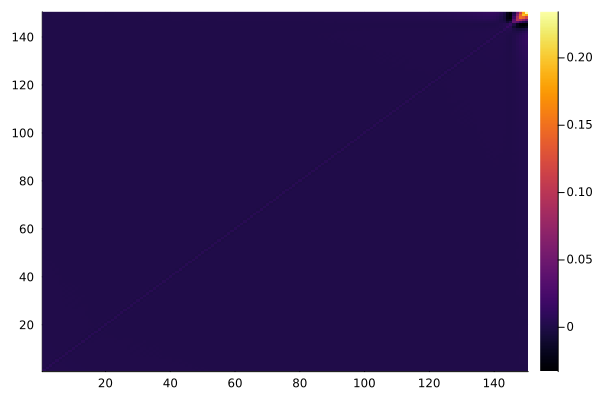

In [9]:
heatmap(Matrix(schur))

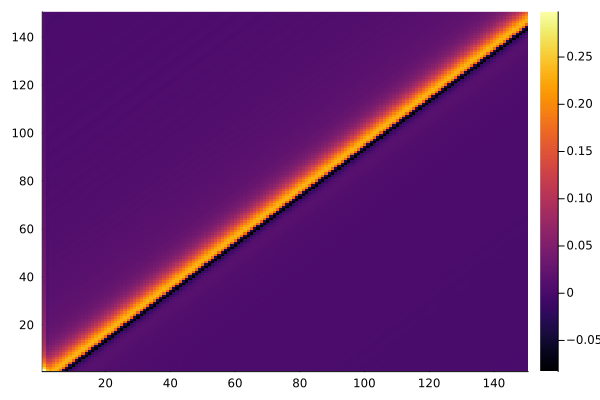

In [6]:
heatmap(L₂₁)

#### simulate / draw from the joint process

In [6]:
n_samples = 50
y = randn(rng, length(t), 2,n_samples)
y₁, y₂ = y[:,1,:], y[:,2,:]

([0.8673472019512456 0.18320263636374276 … -0.2123541740969243 -0.6617868356525305; -0.9017438158568171 0.9750830180778546 … 0.6200474167498596 0.3534237902070267; … ; 0.7971645178681913 0.7713868391795301 … 1.046813501461148 -1.5151783597748314; 0.1031447819424007 0.5908717835604443 … 0.24022751864939837 -1.4227033263454436], [-1.872153330265788 0.4752438796972177 … -0.06786319182534205 0.5724427282078385; -0.08013958339077637 0.42077869488012226 … 0.5432149295007848 -0.08850026230523854; … ; 0.7420543680435578 -0.15681578729918075 … 0.46387360940304373 -0.3645344678798152; -0.06659440050851834 -0.21318037768615042 … 0.669667351621343 1.115885701259562])

In [7]:
x₁_sim = [L₁₁ * y₁[:,i] for i in 1:n_samples];
x₂_sim = [L₂₁ * y₁[:,i] + L₂₂ * y₂[:,i]  for i in 1:n_samples];

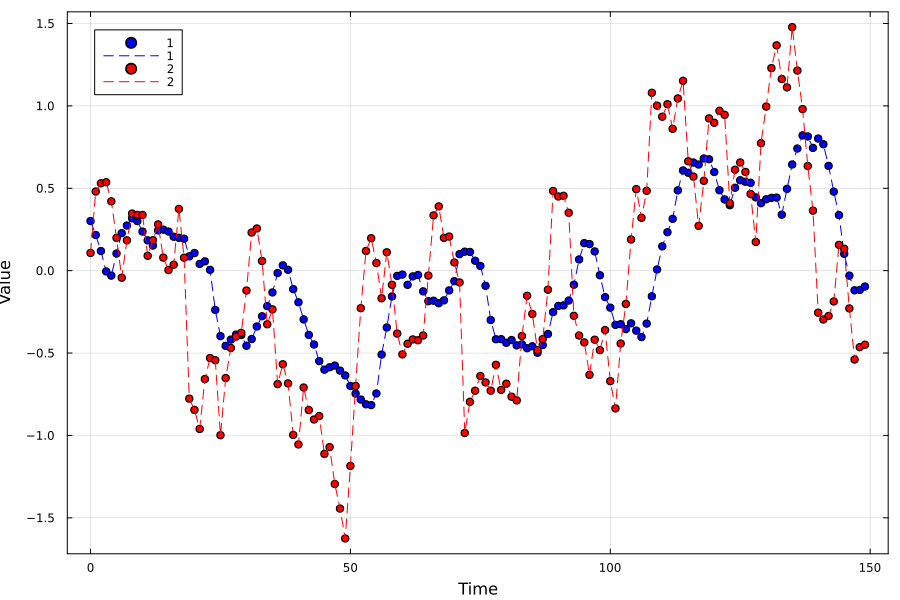

In [8]:
k = 1
scatter(t,x₁_sim[k],label="1", color="blue",framestyle=:box,size=(900,600),xlabel="Time",ylabel="Value")
plot!(t,x₁_sim[k],label="1", color="blue", linestyle=:dash)
scatter!(t,x₂_sim[k],label="2", color="red")
plot!(t,x₂_sim[k],label="2", color="red", linestyle=:dash)

#### Check that the generative model is ok

In [9]:
f, γ², Δφ, γ²_err, Δφ_err, Δτ, Δτ_err, P̄₁, P̄₂, C̄ = cross_periodogram(t, mapreduce(permutedims,vcat,x₁_sim)', mapreduce(permutedims,vcat,x₂_sim)')

┌ Info: Multiple time series detected. Computing the average cross-periodogram.
└ @ Tonari /home/mehdy/github/Tonari.jl/src/periodogram.jl:136


([0.006666666666666667, 0.013333333333333334, 0.02, 0.02666666666666667, 0.03333333333333333, 0.04, 0.04666666666666667, 0.05333333333333334, 0.060000000000000005, 0.06666666666666667  …  0.44, 0.4466666666666667, 0.45333333333333337, 0.46, 0.4666666666666667, 0.4733333333333334, 0.48000000000000004, 0.4866666666666667, 0.49333333333333335, 0.5], [0.9724153747896084; 0.9638905897729728; … ; 0.025988495225052272; 0.005068970031234226;;], [0.20084034138322862; 0.4211359429058141; … ; 2.3675657329200734; 3.141592653589793;;], [0.005440301786217363; 0.007090294284010468; … ; 0.03140397690456805; 0.014167161128910094;;], [0.002797313744342239; 0.0036779559626577843; … ; 0.6041899816172387; 1.3974398192940765;;], [4.7947099655106875; 5.026940027034489; … ; 0.763803627343005; 1.0;;], [0.06678094646864485; 0.04390236539484726; … ; 0.19491855839388836; 0.4448189098281945;;], [295.04211498777886; 212.96228186764338; … ; 0.13215204251615312; 0.14585962029870006;;], [688.556104893156; 453.99389332

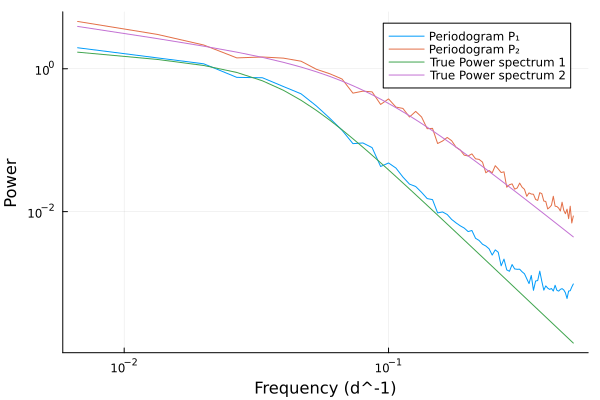

In [10]:
plot(f,P̄₁/length(f)/2,label="Periodogram P₁",xscale=:log10,yscale=:log10)
plot!(f,P̄₂/length(f)/2,xscale=:log10,yscale=:log10,label="Periodogram P₂",xlabel="Frequency (d^-1)",ylabel="Power")
plot!(f,p1(f),xscale=:log10,yscale=:log10,label="True Power spectrum 1")
plot!(f,p2(f),xscale=:log10,yscale=:log10,label="True Power spectrum 2")

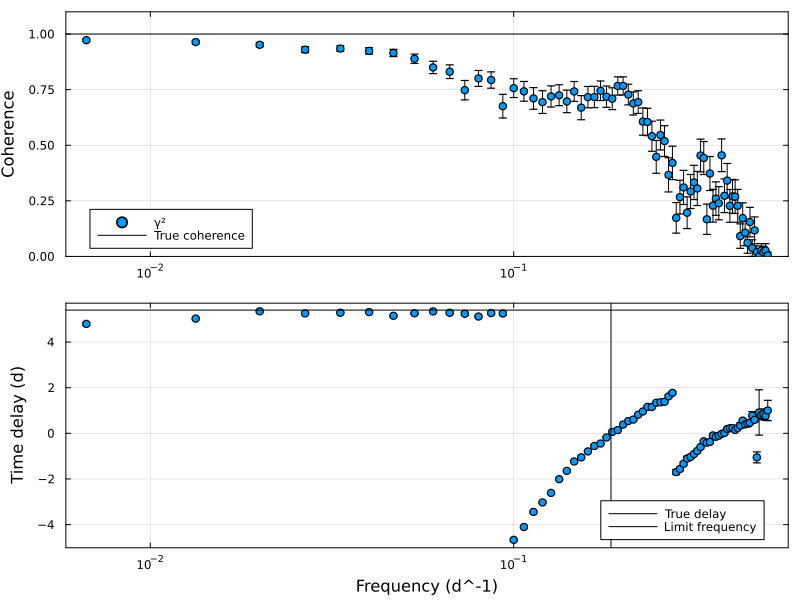

In [11]:
l = @layout [a; b]
pl1 = scatter(f, γ², yerr=γ²_err, label="γ²", xscale=:log10,ylims=(0,1.1),ms=4,ylabel="Coherence",link=:x, framestyle=:box)
pl1 = hline!([1.0],color=:black,label="True coherence")
pl2 = scatter(f, Δτ, yerr=Δτ_err, xscale=:log10, ylabel="Time delay (d)",xlabel="Frequency (d^-1)",link=:x, framestyle=:box,label=nothing)
pl2 = hline!([cs.Δφ.Δτ ],color=:black,label="True delay")
pl2 = vline!([1/cs.Δφ.Δτ ],color=:black,label="Limit frequency")
plot(pl1, pl2, layout=l,size=(800,600))